# Introduction
__[BondGraphTools](http://pypi.org/project/BondGraphTools/)__ is a python based toolkit for the creation and analysis of bond graph models of physical systems. Such physical systems include biomolecular systems; **stoich** is a toolkit for the stoichiometric analysis of such systems. 

This document provides a simple introduction to **stoich** by means of a built-in bond graph model of a simple enzyme-catalysed reaction.

# Example. 
**stoich.model()** implements the enzyme-catalysed reaction: A+E = C = B+E where A is the substrate, B the product, E the enzyme and C an intermediate compound. This can be analysed using the following code.

First import some code:

In [1]:
import BondGraphTools as bgt
import numpy as np
import sympy as sp
import IPython.display as disp
import stoich as st

## Basic analysis
Now perform stoichiometric analysis on the model:

In [2]:
s = st.stoich(st.model())

Swapping Re:r1 for two Sf in ABCE
Swapping Re:r2 for two Sf in ABCE


s is a Python dict containing the stoichiometric information. For example, the stoichometric matrix $N$ where $\dot{X}=NV$ is revealed as:

In [3]:
print(s['N'])

[[-1  0]
 [ 0  1]
 [ 1 -1]
 [-1  1]]


This can be displayed in a more readable form as:

In [4]:
disp.Latex(st.sprintl(s,'N'))

<IPython.core.display.Latex object>

The state (vector of concentrations) $X$ and the vector $V$ of reaction flows are:

In [5]:
disp.Latex(st.sprintl(s,'species'))

<IPython.core.display.Latex object>

In [6]:
disp.Latex(st.sprintl(s,'reaction'))

<IPython.core.display.Latex object>

The corresponding reactions can be displayed:

In [7]:
disp.Latex(st.sprintrl(s))

<IPython.core.display.Latex object>

The stoichometric matrix $N$ gives the species state $X$ in terms of reaction flow $V$ from $\dot{X}=NV$. $N$ is also used together with thermodynamic constants $K$ and rate constants $\kappa$ to give an explicit expresion for reaction flow $V$ in terms of species state $X$. **stoich** computes the symbolic expression as:

In [8]:
disp.Latex(st.sprintl(s,'N'))

<IPython.core.display.Latex object>

In [9]:
disp.Latex(st.sprintvl(s))

<IPython.core.display.Latex object>

## Conserved moieties and Pathways
Conserved moieties are revealed by the matrix $G$ where $G^T N = 0$. In this case:

In [10]:
disp.Latex(st.sprintl(s,'G'))

<IPython.core.display.Latex object>

The first row corresponds to $\dot{x}_A+\dot{x}_B+\dot{x}_C=0$, the sum of the rows (0 0 1 1) corresponds to $\dot{x}_C+\dot{x}_E=0$

Pathways are revealed by the matrix $K$ where $NK = 0$. In this case:

In [11]:
disp.Latex(st.sprintl(s,'K'))

<IPython.core.display.Latex object>

There are no pathways: there is zero flow ($V=0$) in the steady state.

## Chemostats.  
Consider the case where both substrate $A$ and product $B$ are chemostats:

In [12]:
chemostats = ['A','B']

The same system, but with the chemostats, can be analysed using:

In [13]:
sc = st.statify(s,chemostats=chemostats)

The stoichometric matrix $N$ is now:

In [14]:
disp.Latex(st.sprintl(sc,'N'))

<IPython.core.display.Latex object>

The first two rows are zero, corresponding to $\dot{x}_A = \dot{x}_B = 0$: this is because both substrate $A$ and product $B$ are chemostats.

The pathway matrix $K$ is now:

In [15]:
disp.Latex(st.sprintl(sc,'K'))

<IPython.core.display.Latex object>

This means that the flow though reactions r1 and r2 are the same and can be non-zero at steady-state.
The conserved moieties of this chemostated system are revealed by the matrix $G$ 

In [16]:
disp.Latex(st.sprintl(sc,'G'))

<IPython.core.display.Latex object>

The three rows correspond to:
-  $\dot{x}_A= 0$ ($x_A$ is constant)
- $\dot{x}_B= 0$ ($x_B$ is constant)
- $\dot{x}_C + \dot{x}_E = 0$ ($x_C + x_E$ is constant)


## Pathway analysis

In [17]:
## Find the pathway stoichiometric matrix
sp = st.path(s,sc)
## And show the coreponding reaction
disp.Latex(st.sprintrl(sp))

<IPython.core.display.Latex object>

## Simulation
Although __[BondGraphTools](http://pypi.org/project/BondGraphTools/)__ has its own simulation tool, the particular form of stoichiometric equations allows for a special purpose simulation tool taking advantage of explicit equations and reducing the state dimension in the presence of conserved moieties.

The system (without chemostats) can be simulated as:

In [18]:
X0 = np.array([2,1,1,1]) # Set initial states
result = st.sim(s,X0=X0) # Simulate

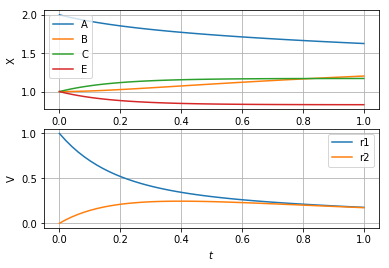

In [19]:
st.plot(s,result)

The flows $V$ though r1 and r2 seem to be heading towards zero as predicted by pathway analysis. This can ve verified by simulating over a longer time:

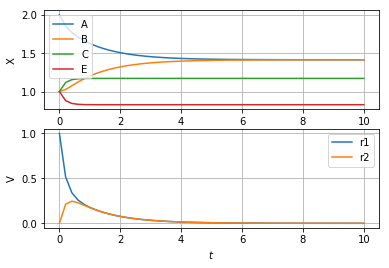

In [20]:
t = np.linspace(0,10)
result = st.sim(s,X0=X0,t=t)
st.plot(s,result)

The system with chemostats can be simulated as:

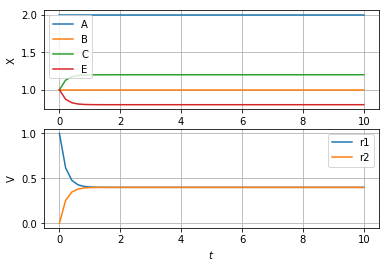

In [21]:
t = np.linspace(0,10)
result = st.sim(s,X0=X0,t=t,sc=sc)
st.plot(s,result)

As predicted by pathway analysis, the two flows converge on a non-zero value.

Of course, these simulations have been using default (unity) values for parameters. These defaults can be changed by explicitly supplying parameters:

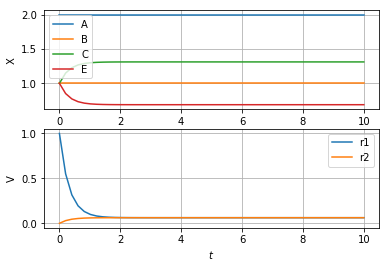

In [22]:
parameter={'kappa_r2':0.1}
result = st.sim(s,X0=X0,t=t,sc=sc,parameter=parameter)
st.plot(s,result)

Moreover, the four initial conditions can be explicity chosen, for example:
-  $$
X_0 = 
\begin{pmatrix}
1 & 2 & 1 & 1
\end{pmatrix}^T
$$
Note that the default value was 
-  $$
X_0 = 
\begin{pmatrix}
2 & 1 & 1 & 1
\end{pmatrix}^T
$$

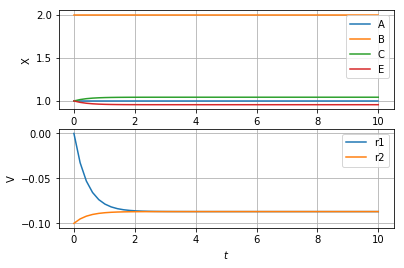

In [23]:

X0 = np.array([1,2,1,1])
result = st.sim(s,t=t,sc=sc,parameter=parameter,X0=X0)
st.plot(s,result)

As the product $B$ amount is greater than that of the substrate $A$, the flow proceeds in reverse.

### Time-varying chemostats
By default, chemostats remain at the corresponding initial state. This can be changed by declaring a time-varying expression for the chemostat state. For example, set the chemostat for substrate $A$ to have a value of $1+t$:

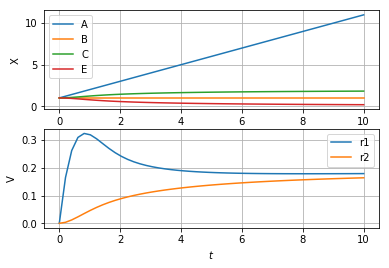

In [24]:
X_chemo = {'A':'1+t'}
result = st.sim(s,t=t,sc=sc,parameter=parameter,X_chemo=X_chemo)
st.plot(s,result)

Note that the flow rates reach a maximum value as the amount of enzyme $x_E$ reduces to zero. This behaviour is typical of systems with conserved moities in general and enzyme catalysed reactions in particular.